In [1]:
import pandas as pd
csv_data = pd.read_csv('D:\\College\\Sem2\\Dissertation\\Hotel_Reviews.csv')

In [2]:
def filter_country(address):
    country = address.split()[-1]
    if (country == 'Kingdom'):
                country = 'United Kingdom'
    return country

csv_data["Country_Name"] = csv_data["Hotel_Address"].apply(lambda x: filter_country(x))

In [4]:
csv_data.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country_Name
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands


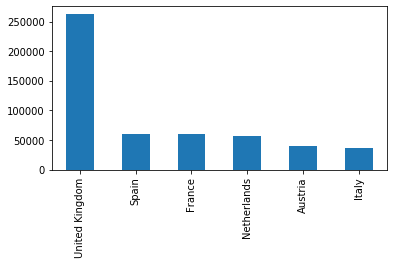

In [8]:
csv_data['Country_Name'].value_counts().plot(kind='bar', figsize = (6, 3))

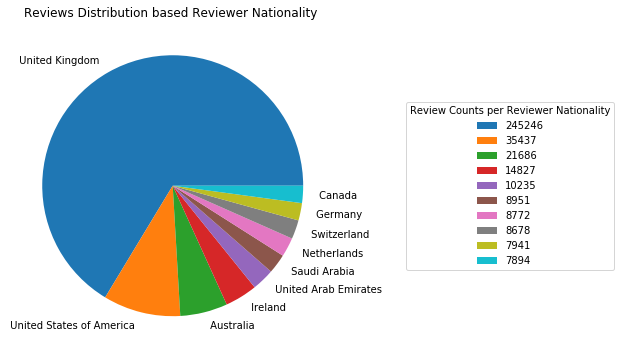

In [4]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots(figsize =(9, 6)) 
plt.pie(csv_data.Reviewer_Nationality.value_counts().head(10), labels = csv_data.Reviewer_Nationality.value_counts().head(10).index)

ax.set_title("Reviews Distribution based Reviewer Nationality ") 
# Adding legend 
ax.legend(csv_data.Reviewer_Nationality.value_counts().head(10), 
          title ="Review Counts per Reviewer Nationality", 
          loc ="center left", 
          bbox_to_anchor =(1.2, 0, 0.5, 1)) 
  

plt.show()

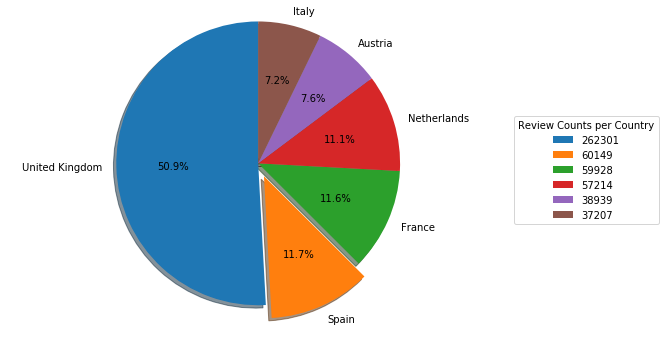

In [10]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = csv_data.Country_Name.value_counts().index
explode = (0, 0.1, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(9, 6)) 
ax1.pie(csv_data.Country_Name.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(csv_data.Country_Name.value_counts(), 
          title ="Review Counts per Country", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.show()

                Top 10 dates when good number of reviewer reviewed the hotels

In [11]:
csv_data.Review_Date.value_counts().head(10)

8/2/2017     2585
9/15/2016    2308
4/5/2017     2284
8/30/2016    1963
2/16/2016    1940
7/5/2016     1904
5/31/2016    1860
12/5/2016    1803
7/12/2016    1801
8/2/2016     1783
Name: Review_Date, dtype: int64

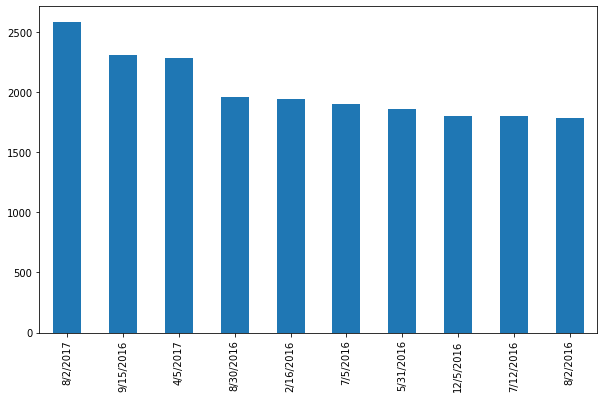

In [12]:
csv_data.Review_Date.value_counts().head(10).plot(kind='bar', figsize = (10, 6))

                      Below is the Trend of top 5 different hotels

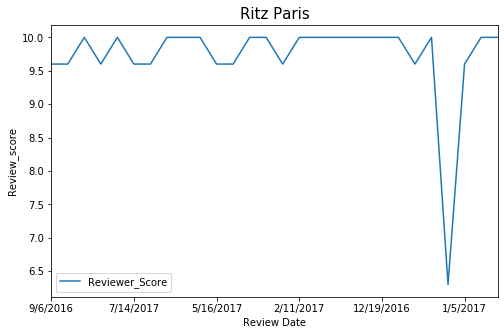

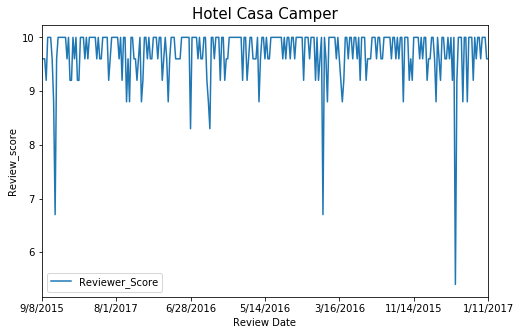

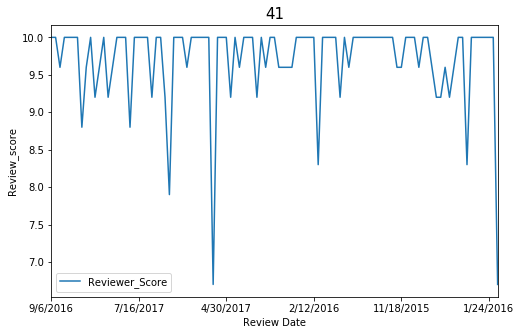

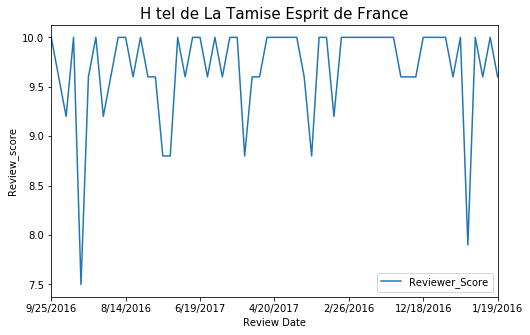

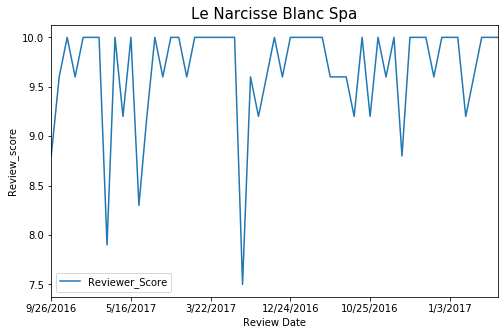

In [36]:
import matplotlib.pyplot as plt
fliter_data = csv_data[['Hotel_Name','Reviewer_Score']].groupby(['Hotel_Name']).mean()
fliter_data = fliter_data.sort_values('Reviewer_Score',ascending = False).head(5)
top_5 = fliter_data.head(5).index

for i in top_5:
    trend = csv_data[csv_data.Hotel_Name == i]
    trend = trend.sort_values('Review_Date',ascending = False)
    trend.plot('Review_Date', 'Reviewer_Score',figsize=(6,4))
    plt.xlabel('Review Date', fontsize=8)
    plt.ylabel('Review_score', fontsize=8)
    plt.title(i, fontsize=12)
    plt.show()

In [37]:
csv_data["Good_Review"] = csv_data["Reviewer_Score"].apply(lambda x: 1 if x > 6.7 else 0)
csv_data["Bad_Review"] = csv_data["Reviewer_Score"].apply(lambda x: 0 if x > 6.7 else 1)
csv_data['Good_Review'].value_counts()
csv_data['Bad_Review'].value_counts()

0    428916
1     86822
Name: Bad_Review, dtype: int64

In [40]:
csv_data["Review_Status"] = csv_data["Reviewer_Score"].apply(lambda x: 1 if x > 6.7 else 0)

In [39]:
good_bad_comp = csv_data[['Hotel_Name','Bad_Review','Good_Review']].groupby(['Hotel_Name'])['Bad_Review','Good_Review'].sum()

In [41]:
good_bad_comp = good_bad_comp.sort_values('Good_Review',ascending = False)
print(good_bad_comp.shape)
good_bad_comp.head(10)

(1492, 2)


,Bad_Review,Good_Review
Hotel_Name,,
Park Plaza Westminster Bridge London,525,3644
Strand Palace Hotel,829,3427
Copthorne Tara Hotel London Kensington,677,2901
DoubleTree by Hilton Hotel London Tower of London,390,2822
Britannia International Hotel Canary Wharf,2277,2512
Intercontinental London The O2,69,2482
Grand Royale London Hyde Park,931,2027
M by Montcalm Shoreditch London Tech City,157,1998
Hilton London Wembley,244,1983


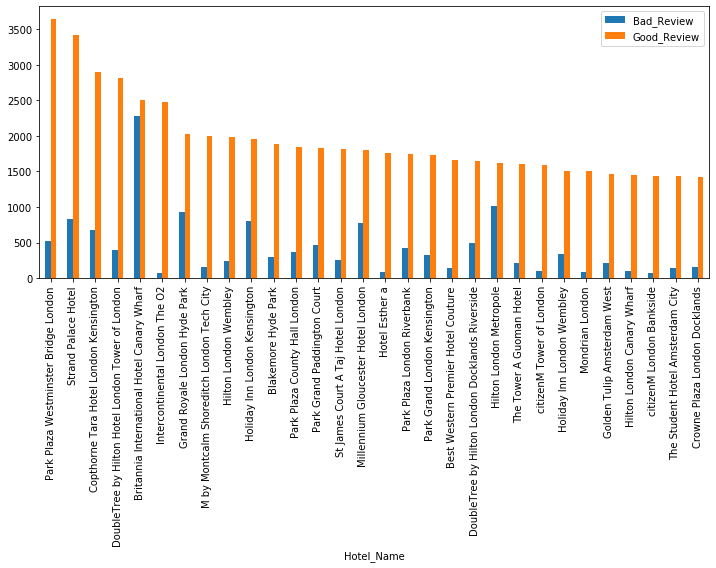

In [48]:
good_bad_comp.head(30).plot(kind='bar',figsize = (12, 5))

#Develop a relationship between the independent and dependent variables

In [64]:
csv_data.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Country_Name', 'Review_Status',
       'Good_Review', 'Bad_Review'],
      dtype='object')

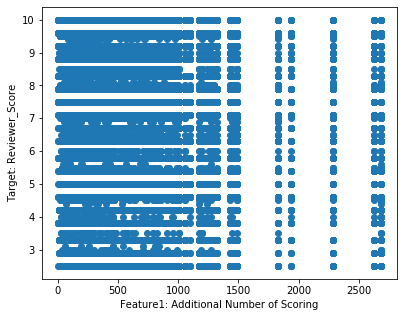

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(csv_data['Additional_Number_of_Scoring'], csv_data['Reviewer_Score'])
plt.ylabel('Target: Reviewer_Score')
plt.xlabel('Feature1: Additional Number of Scoring')

plt.show()

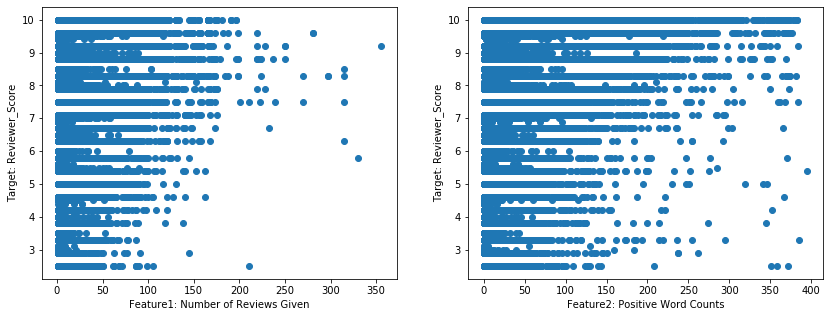

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(csv_data['Total_Number_of_Reviews_Reviewer_Has_Given'], csv_data['Reviewer_Score'])
plt.ylabel('Target: Reviewer_Score')
plt.xlabel('Feature1: Number of Reviews Given')

plt.subplot(1,2,2)
plt.scatter(csv_data['Review_Total_Positive_Word_Counts'], csv_data['Reviewer_Score'])
plt.ylabel('Target: Reviewer_Score')
plt.xlabel('Feature2: Positive Word Counts')

plt.show()

Text(0.5, 0, 'Feature1: Total Number of Reviews')

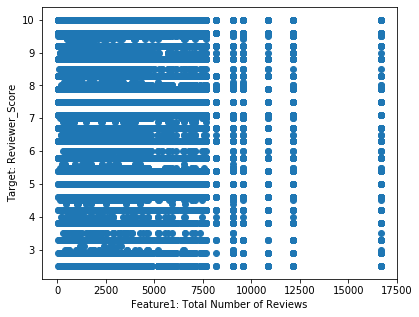

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(csv_data['Total_Number_of_Reviews'], csv_data['Reviewer_Score'])
plt.ylabel('Target: Reviewer_Score')
plt.xlabel('Feature1: Total Number of Reviews')

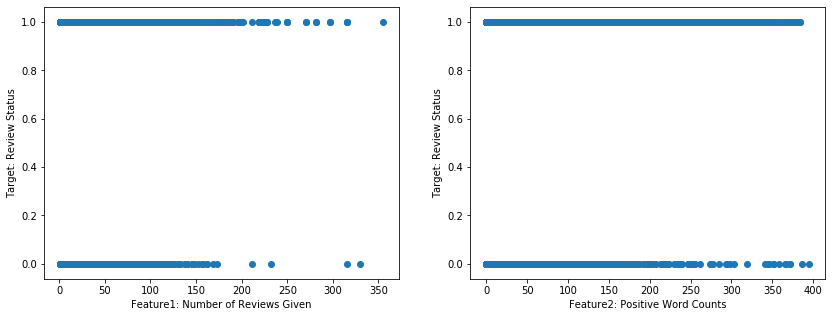

In [73]:
#https://datascience.stackexchange.com/questions/31752/plot-show-relationship-between-independent-variable-and-
#dependent-variablebinar
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(csv_data['Total_Number_of_Reviews_Reviewer_Has_Given'], csv_data['Review_Status'])
plt.ylabel('Target: Review Status')
plt.xlabel('Feature1: Number of Reviews Given')

plt.subplot(1,2,2)
plt.scatter(csv_data['Review_Total_Positive_Word_Counts'], csv_data['Review_Status'])
plt.ylabel('Target: Review Status')
plt.xlabel('Feature2: Positive Word Counts')

plt.show()

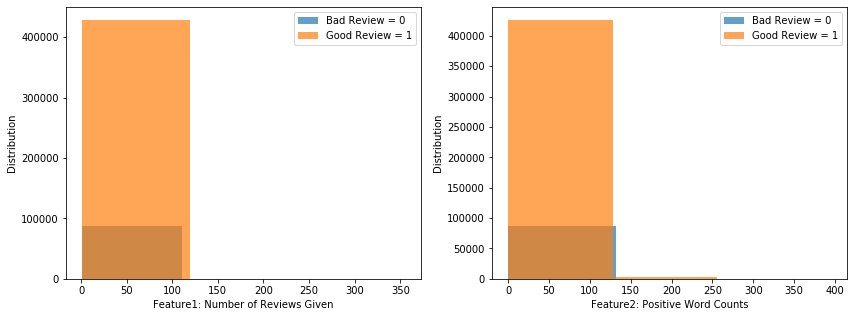

In [72]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(csv_data['Total_Number_of_Reviews_Reviewer_Has_Given'][csv_data['Review_Status'] == 0], bins=3, alpha = 0.7, label = 'Bad Review = 0')
plt.hist(csv_data['Total_Number_of_Reviews_Reviewer_Has_Given'][csv_data['Review_Status'] == 1], bins=3, alpha = 0.7, label = 'Good Review = 1')
plt.ylabel('Distribution')
plt.xlabel('Feature1: Number of Reviews Given')
plt.legend()

plt.subplot(1,2,2)
plt.hist(csv_data['Review_Total_Positive_Word_Counts'][csv_data['Review_Status'] == 0], bins=3, alpha = 0.7, label = 'Bad Review = 0')
plt.hist(csv_data['Review_Total_Positive_Word_Counts'][csv_data['Review_Status'] == 1], bins=3, alpha = 0.7, label = 'Good Review = 1')
plt.ylabel('Distribution')
plt.xlabel('Feature2: Positive Word Counts')
plt.legend()

plt.show()

Visualizing pairwise relationships in a dataset

In [11]:
dfff.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Country_Name', 'Good_Review',
       'Bad_Review', 'Review_Status'],
      dtype='object')

In [62]:
csv_data["Reviews_Sentiments"] = csv_data["Reviewer_Score"].apply(lambda x: 'Good' if x > 6.7 else 'Bad')
df = pd.DataFrame()
df[['Review_Date','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts','Reviewer_Score','Total_Number_of_Reviews_Reviewer_Has_Given','Reviews_Sentiments']] = csv_data[['Review_Date','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts','Reviewer_Score','Total_Number_of_Reviews_Reviewer_Has_Given','Reviews_Sentiments']]
df_new = df.rename(columns={'Review_Total_Negative_Word_Counts': 'Negative Word Count','Review_Total_Positive_Word_Counts':'Positive Word Count','Total_Number_of_Reviews_Reviewer_Has_Given':'Number of Reviews'})

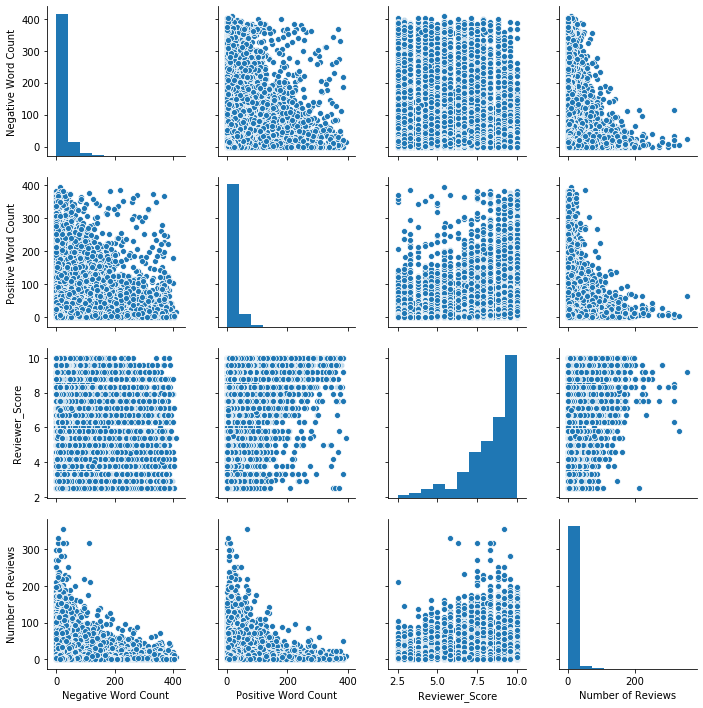

In [64]:
import seaborn as sns
sns.pairplot(df_new)

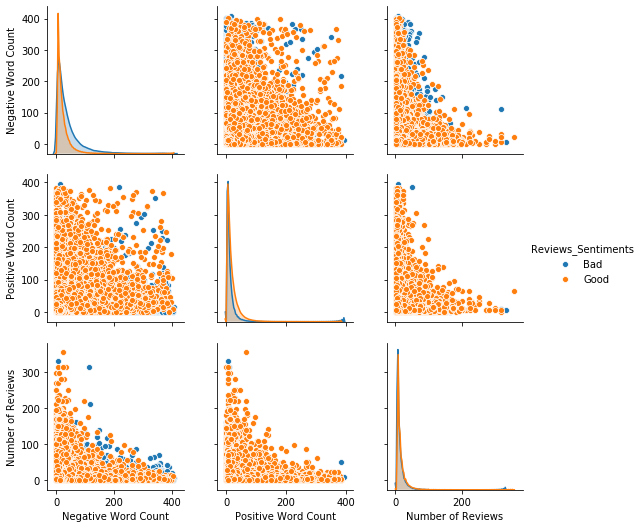

In [66]:
sns.pairplot(df_new.drop(['Reviewer_Score'], axis=1), hue="Reviews_Sentiments") 

In [67]:
# df = csv_data[csv_data.Review_Status == 1]
# sns.distplot(df['Total_Number_of_Reviews_Reviewer_Has_Given'], hist = False, kde = True, label='Good')
# df1 = csv_data[csv_data.Review_Status == 0]
# sns.distplot(df1['Total_Number_of_Reviews_Reviewer_Has_Given'], hist = False, kde = True, label='Bad')
# # Plot formatting
# plt.legend(prop={'size': 12})
# plt.title('Number of Reviews vs Review Sentiments')
# plt.xlabel('Number of Reviews')
# plt.ylabel('Density')  

In [68]:
df_new.corr(method ='pearson')

,Negative Word Count,Positive Word Count,Reviewer_Score,Number of Reviews
Negative Word Count,1.000000,0.119613,-0.382474,0.003199
Positive Word Count,0.119613,1.000000,0.220800,0.026535
Reviewer_Score,-0.382474,0.220800,1.000000,0.002873
Number of Reviews,0.003199,0.026535,0.002873,1.000000


In [69]:
df_new.corr(method ='kendall')

,Negative Word Count,Positive Word Count,Reviewer_Score,Number of Reviews
Negative Word Count,1.000000,0.014967,-0.347291,0.005794
Positive Word Count,0.014967,1.000000,0.225579,0.033821
Reviewer_Score,-0.347291,0.225579,1.000000,-0.019645
Number of Reviews,0.005794,0.033821,-0.019645,1.000000


In [70]:
df_new.corr(method ='spearman')

,Negative Word Count,Positive Word Count,Reviewer_Score,Number of Reviews
Negative Word Count,1.000000,0.022837,-0.470360,0.007960
Positive Word Count,0.022837,1.000000,0.312164,0.047334
Reviewer_Score,-0.470360,0.312164,1.000000,-0.026539
Number of Reviews,0.007960,0.047334,-0.026539,1.000000


From above correlations it can be interpreted as :
    The correlation coefficient can range in value from −1 to +1.
    An absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.
    If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward.